In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
ds = pd.read_csv('workingData\cars.csv')
ds.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
ds.columns.values
ds = ds[['manufacturer_name', 'model_name', 'transmission',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_capacity', 'price_usd']]
ds.head()

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_capacity,price_usd
0,Subaru,Outback,automatic,190000,2010,gasoline,2.5,10900.00
1,Subaru,Outback,automatic,290000,2002,gasoline,3.0,5000.00
2,Subaru,Forester,automatic,402000,2001,gasoline,2.5,2800.00
3,Subaru,Impreza,mechanical,10000,1999,gasoline,3.0,9999.00
4,Subaru,Legacy,automatic,280000,2001,gasoline,2.5,2134.11


## Cleanup

In [4]:
ds = ds.dropna(axis=0) #drop all missing values

In [5]:
#remove the outliers
q = ds['odometer_value'].quantile(0.99)
ds = ds[ds['odometer_value']<q]
q = ds['year_produced'].quantile(0.01)
ds = ds[ds['year_produced']>q]
ds = ds[ds['engine_capacity']<6.3]
q = ds['price_usd'].quantile(0.99)
ds = ds[ds['price_usd']<q]
q = ds['price_usd'].quantile(0.01)
ds =ds[ds['price_usd']>q]

ds = ds.reset_index(drop=True)

## Analysis

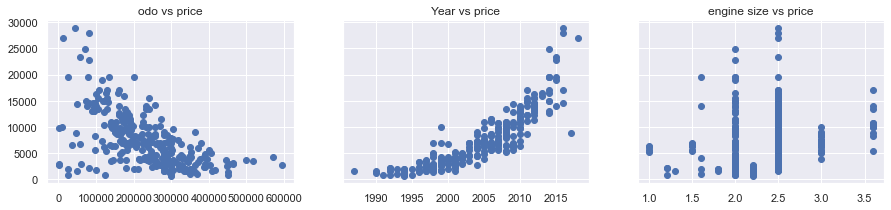

In [6]:
#ds1= ds[ds['model_name']=='Outback']
ds=ds[ds['manufacturer_name']=='Subaru']
ds1=ds

f,(pt1,pt2,pt3) = plt.subplots(1,3,sharey=True, figsize = (15,3))
pt1.scatter(ds1['odometer_value'],ds1['price_usd'])
pt1.set_title('odo vs price')
pt2.scatter(ds1['year_produced'],ds1['price_usd'])
pt2.set_title('Year vs price')
pt3.scatter(ds1['engine_capacity'],ds1['price_usd'])
pt3.set_title('engine size vs price')
plt.show()

In [7]:
ds.describe(include='all')  #viewing data after cleanup

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_capacity,price_usd
count,289,289,289,289.000000,289.000000,289,289.000000,289.000000
unique,1,10,2,NaN,NaN,3,NaN,NaN
top,Subaru,Forester,automatic,NaN,NaN,gasoline,NaN,NaN
freq,289,80,181,NaN,NaN,267,NaN,NaN
mean,NaN,NaN,NaN,231598.474048,2004.477509,NaN,2.329412,7449.929170
std,NaN,NaN,NaN,107067.713374,6.022557,NaN,0.459770,5169.199386
min,NaN,NaN,NaN,193.000000,1987.000000,NaN,1.000000,650.000000
25%,NaN,NaN,NaN,160000.000000,2000.000000,NaN,2.000000,3500.000000
50%,NaN,NaN,NaN,232000.000000,2005.000000,NaN,2.500000,6650.000000
75%,NaN,NaN,NaN,300000.000000,2009.000000,NaN,2.500000,10100.000000


In [8]:
#if the chart is not linear, use logerethemic function on price to make it linear.
#ds['log_price'] = np.log(ds['price_usd'])

## Prepare

In [9]:
# seperate the inputs and Targets from the dataset.
ds =  ds.sort_values('odometer_value', ascending=True)
X = np.array(ds['odometer_value'])
y = np.array(ds['price_usd'])

In [10]:
#split the data to Train and Test.  use random state to get repetable random data in both sets.
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=3)

In [11]:
## input is scalled so that the impact is equal.  ((Value - Mean)/standard deviation)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scale = scaler.fit_transform(xtrain.reshape(-1,1))

scaler_y = StandardScaler()
ytrain_scale = scaler_y.fit_transform(ytrain.reshape(-1,1))

## Decision Tree Regression

In [12]:
#  DecisionTree Regression !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier(random_state=3)  #, max_depth=4, min_samples_leaf=10
reg.fit(xtrain.reshape(-1,1),ytrain.reshape(-1,1).astype(int))

DecisionTreeClassifier(random_state=3)

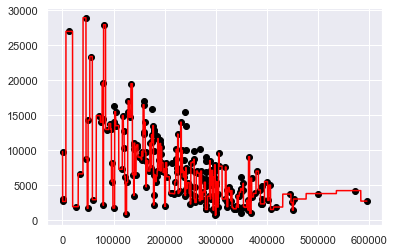

In [13]:
#predit the price based on trained model
y_hat =  reg.predict(xtrain.reshape(-1,1)) #using training data itself

# check prediction against Actual value
plt.scatter(xtrain, ytrain, c='black')
#plt.plot(xtrain, y_hat, color = 'blue')

# plt.scatter(xtrain, ypoly_hat, color = 'black')
#model prediction line
xgrid = np.arange(min(xtrain)-1, max(xtrain)+2, 1)
xgrid = xgrid.reshape(-1,1)
plt.plot(xgrid, reg.predict(xgrid), color = 'red')

In [14]:
#residual plot. mean should be 0. longer -ve tail means we are over estimating (prediction is mostly more than actual value).
# +ve tail means under estimating.
#sb.displot(ytrain - y_hat)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021C1DE49B80> (for post_execute):


KeyboardInterrupt: 

In [15]:
reg.coef_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

In [16]:
reg.intercept_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'intercept_'

## Testing

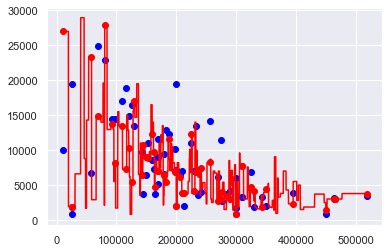

In [18]:
plt.scatter(xtest, ytest, c='blue')   #alpha like heat map , alpha=0.2

#model prediction line
xgrid = np.arange(min(xtest)-1, max(xtest)+2, 1)
xgrid = xgrid.reshape(-1,1)
plt.plot(xgrid, reg.predict(xgrid), color = 'red')

# scale the test data with the same scaler for features used for train
# inverse scale the redicted data for target.
y_hat_test = reg.predict(xtest.reshape(-1,1))
plt.scatter(xtest, y_hat_test, c='red')

In [ ]:
# scale the test data with the same scaler for features used for train
# inverse scale the redicted data for target.
y_hat_test = reg.predict(xtest.reshape(-1,1))
plt.scatter(y_hat_test, ytest, c='blue')   #alpha like heat map , alpha=0.2

plt.plot([0, 17500], [0, 17500], color = 'black')

In [ ]:
sb.displot(ytest-y_hat_test)

In [19]:
# check result manually
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])  
df_pf['target'] = ytest
df_pf['Year'] = xtest
df_pf['Residual'] = df_pf['target']- df_pf['Prediction']
df_pf['Diff%'] = np.absolute(df_pf['Residual']/df_pf['target']*100)
#xtest= xtest.reset_index(drop=True) 
#df3 = pd.concat(df_pf,xtest, axis=1)
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)  #format % to 2 decimal
df_pf.sort_values('Year' , ascending=True).head(99)

,Prediction,target,Year,Residual,Diff%
45,27000,9999.00,10000,-17001.00,170.03
18,1896,800.00,25000,-1096.00,137.00
37,1896,19499.00,25480,17603.00,90.28
48,23400,6750.00,58270,-16650.00,246.67
10,14938,24900.00,69500,9962.00,40.01
55,27950,22850.00,80467,-5100.00,22.32
30,13800,14499.00,92300,699.00,4.82
4,8200,14500.00,98000,6300.00,43.45
44,13500,17000.00,109000,3500.00,20.59
7,7250,18900.00,116000,11650.00,61.64


In [ ]:
#SSE  Sumof Squared error
x=df_pf['Residual']**2
x.sum()

In [20]:
np.sum(df_pf['Residual']**2)

2181476598.5025

In [ ]:
y_hat_test

In [ ]:
xtest